In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from single_photons.environment import Particle
from single_photons.utils.parameters import *

In [17]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({
    "text.usetex": True,
})

In [18]:
p = 0
radius = 75e-9
wavelength = 1.064e-6
power = 300e-3
waist = 0.6e-6
eta_detection = 0.178
delta_t = 1e-9
control_step = 30 
fs = 1/(control_step*delta_t)
gamma, omega, ba_force, std_detection, std_z = compute_parameters_simulation(power, wavelength, waist, 
                                                                      radius, p, fs, eta_detection)
coupling = (1/(4*np.pi))*(ba_force**2)
env = Particle(omega, gamma, coupling, eta_detection=eta_detection)
std_detection = std_detection/env.zp_x
period = 2*np.pi/omega
t = np.arange(0, 20 * period, delta_t)
N = t.shape[0]

In [19]:
states = np.array([[1],[0.]])
new_states = np.zeros((N,2)) 
measured_states = np.zeros((N, 2))
for i in tqdm(range(t.shape[0])):
    new_states[i,:] = states[:,0]
    measured_states[i, :] = states[:, 0] + std_detection*np.random.normal()
    states = env.step(states, control=0, delta_t=delta_t)

  0%|          | 0/250693 [00:00<?, ?it/s]100%|██████████| 250693/250693 [00:08<00:00, 29085.65it/s]


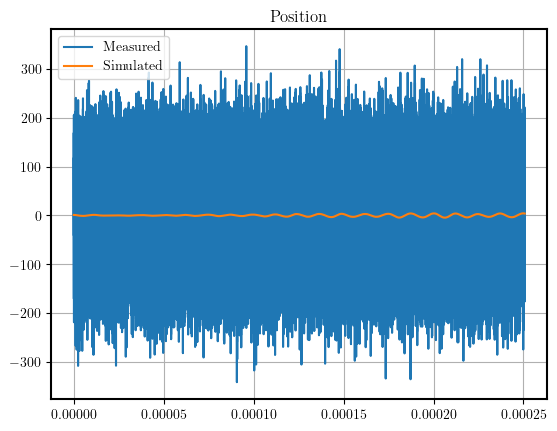

In [20]:
fig = plt.Figure()
plt.title('Position')
plt.plot(t, measured_states[:,0])
plt.plot(t, new_states[:,0])
plt.grid()
plt.legend(['Measured', 'Simulated'])
plt.show()

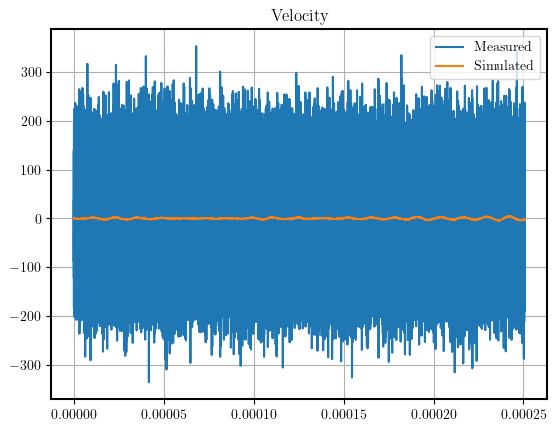

In [15]:
fig = plt.Figure()
plt.title('Velocity')
plt.plot(t, measured_states[:,1])
plt.plot(t, new_states[:,1])
plt.grid()
plt.legend(['Measured', 'Simulated'])
plt.show()